In [2]:
#Import modules
%matplotlib inline
# %pip install seaborn
import tweepy as tp
from tweepy import Cursor
#handling data
import pandas as pd
import numpy as np
from scipy import stats
import time
# from operator import itemgetter

#import twitter credentials
# from twitter_credentials import *

#handling information
import re
import json

#handling plots
import matplotlib.pyplot as plt
import seaborn as sns

#for network creation
import networkx as nx

In [19]:
# Establish TwitterConnection Creds
api_key="UJ4IDf8TDkwxl7ooMeZLOGxaY"
api_key_secret="EXG1e6MlQ7mGPv86cRBllGv38QeCC4B91pYqxnKmK4Xg777LCt"
access_token="258202282-7LQJcDTcGDL4rjVKviQLpHAgjXMqHYl6wQnSgDpN"
access_token_secret="F0YXJLpX0iELDZ692ExHvcARrvpJpXYfV6TYj3ssUVjRF"
auth = tp.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tp.API(auth)

# api = tweepy.API(auth, wait_on_rate_limit=True,wait_on_rate_limit_notify=True)
# client = tp.Client("AAAAAAAAAAAAAAAAAAAAAIxYfgEAAAAA7d%2F8V8UqVprw17NlDSwUVKmSqbo%3DPzDdenF34bjXu3KR36M0sEUjNPffgvTuUsT5s4cQjerqwHrF4E",wait_on_rate_limit=True)
client = tp.Client("AAAAAAAAAAAAAAAAAAAAAIxYfgEAAAAA7d%2F8V8UqVprw17NlDSwUVKmSqbo%3DPzDdenF34bjXu3KR36M0sEUjNPffgvTuUsT5s4cQjerqwHrF4E")


In [65]:
# Extract ego id and Followers of Elon 
sEgoId = client.get_user(username="elonmusk").data.id
sEgoName = client.get_user(username="elonmusk").data.username


### Below code gets followers details

In [48]:
follower_ids=[]

followers = tp.Cursor(api.get_followers, user_id=sEgoId, count = 5000).pages()
while True:
    try:
        follower = next(followers)
        follower_ids.extend(follower)
        if len(follower_ids)>30000:
            break;
    except tp.TooManyRequests:
        print('Http 429 Reaced Rate Limit. Sleeping for 15 minutes 30 Seconds')
        time.sleep(62*15)

Http 429 Reaced Rate Limit. Sleeping for 15 minutes 30 Seconds
Http 429 Reaced Rate Limit. Sleeping for 15 minutes 30 Seconds
Http 429 Reaced Rate Limit. Sleeping for 15 minutes 30 Seconds
Http 429 Reaced Rate Limit. Sleeping for 15 minutes 30 Seconds
Http 429 Reaced Rate Limit. Sleeping for 15 minutes 30 Seconds
Http 429 Reaced Rate Limit. Sleeping for 15 minutes 30 Seconds
Http 429 Reaced Rate Limit. Sleeping for 15 minutes 30 Seconds
Http 429 Reaced Rate Limit. Sleeping for 15 minutes 30 Seconds
Http 429 Reaced Rate Limit. Sleeping for 15 minutes 30 Seconds
Http 429 Reaced Rate Limit. Sleeping for 15 minutes 30 Seconds
Http 429 Reaced Rate Limit. Sleeping for 15 minutes 30 Seconds
Http 429 Reaced Rate Limit. Sleeping for 15 minutes 30 Seconds
Http 429 Reaced Rate Limit. Sleeping for 15 minutes 30 Seconds
Http 429 Reaced Rate Limit. Sleeping for 15 minutes 30 Seconds
Http 429 Reaced Rate Limit. Sleeping for 15 minutes 30 Seconds
Http 429 Reaced Rate Limit. Sleeping for 15 minutes 30 

KeyboardInterrupt: 

In [505]:
len(follower_ids)

9410

In [96]:
# - a ‘followers’ sample of approx 10,000 accounts,
fdfNmae="firstDegreeFollowers.csv"
columns = ['id', 'screen_name','followers_count','friends_count']
data = []
for user in follower_ids:
    data.append([user.id, user.screen_name, user.followers_count, user.friends_count])
df = pd.DataFrame(data, columns=columns)
df.to_csv(fdfNmae)

In [87]:
following = tp.Cursor(api.get_friends, user_id=sEgoId, count = 5000).pages()

In [91]:
# - all the first friends

following_list=[]
    
while True:
    try:
        follow = next(following)
        following_list.extend(follow)
        if len(following_list)>3000:
            break;
    except tp.TooManyRequests:
        print('Http 429 Reaced Rate Limit. Sleeping for 15 minutes 30 Seconds')
        time.sleep(62*15)
    except StopIteration:
        break

Http 429 Reaced Rate Limit. Sleeping for 15 minutes 30 Seconds


In [97]:
fdfrndNmae="firstDegreeFriends.csv"
columns = ['id', 'screen_name','followers_count','friends_count']
data = []
for user in following_list:
    data.append([user.id, user.screen_name, user.followers_count, user.friends_count])
df = pd.DataFrame(data, columns=columns)
df.to_csv(fdfrndNmae)

In [706]:
# Collection of 18,000 tweets
# tweet = tp.Cursor(api.user_timeline, screen_name='@elonmusk').items()

tweets_list=[]
while True:
    try:
        tw = next(tweet)
        tweets_list.append(tw)
        if len(tweets_list)>3000:
            break;
    except tp.TooManyRequests:
        print('Http 429 Reaced Rate Limit. Sleeping for 15 minutes 30 Seconds')
        time.sleep(62*15)
    except StopIteration:
        break

prevYerasTweets = pd.read_csv("2years.csv")
prevYerasTweetsnew = prevYerasTweets.filter(['id','date','tweet','reply_to'], axis=1)
tweets_list[0]._json

latestTweets="latestTweets1.csv"
columns = ['id' ,'date','tweet','reply_to'] 
data = []
for tweet in tweets_list:
    data.append([tweet.id, tweet.created_at, tweet.text, tweet.entities['user_mentions']])
df = pd.DataFrame(data, columns=columns)
df.to_csv(latestTweets)
dfext = pd.read_csv(latestTweets)
dfext  = dfext.filter(['id','date','tweet','reply_to'], axis=1)
completetTweet= dfext.append(prevYerasTweetsnew)
completetTweet.to_csv('CompleteTweet.csv')
completetTweet.shape

In [707]:
df

,id,date,tweet,reply_to
0,1583026862816890882,2022-10-20 09:26:29+00:00,@Neuro_Skeptic Same,"[{'screen_name': 'Neuro_Skeptic', 'name': 'Neu..."
1,1583004448267255808,2022-10-20 07:57:25+00:00,@marenkahnert @jasondebolt Exactly,"[{'screen_name': 'marenkahnert', 'name': 'Mare..."
2,1582997766741327873,2022-10-20 07:30:52+00:00,@Teslarati @13ericralph31 SpaceX has more acti...,"[{'screen_name': 'Teslarati', 'name': 'TESLARA..."
3,1582987988233256961,2022-10-20 06:52:01+00:00,@jasondebolt The media reports with great fanf...,"[{'screen_name': 'jasondebolt', 'name': 'Jason..."
4,1582984673235697664,2022-10-20 06:38:51+00:00,@jakebrowatzke @andyjayhawk 🤣,"[{'screen_name': 'jakebrowatzke', 'name': 'Jak..."
...,...,...,...,...
2996,1489340604215615492,2022-02-03 20:50:45+00:00,Congrats SpaceX Falcon team! https://t.co/Zplh...,[]
2997,1489337417446404096,2022-02-03 20:38:05+00:00,@teslaownersSV Exactly. The terminology is ana...,"[{'screen_name': 'teslaownersSV', 'name': 'Tes..."
2998,1489301309559693314,2022-02-03 18:14:36+00:00,RT @SpaceX: Watch Falcon 9 launch 49 Starlink ...,"[{'screen_name': 'SpaceX', 'name': 'SpaceX', '..."
2999,1489106130135564292,2022-02-03 05:19:02+00:00,"@pmarca Who controls the memes,\nControls the ...","[{'screen_name': 'pmarca', 'name': 'Marc Andre..."


1186

In [716]:
# - the first-degree user mentions and replies from those 18,000 tweets,

# getUsers from tweet mentions
listodTweetMentions= []

def getTweetMentions(row):
    recCount= 1 
    try:
        rec = row['reply_to']
        rec = rec.replace("'", '"')
        hsList = json.loads(rec)
        newHSlist= []
        if len(hsList) > 0:
            for hs in hsList:
                for key,value in hs.items():
                    if key == 'id':
                        listodTweetMentions.append(value)
    except :
        recCount += 1
    print(recCount)

In [263]:
len(listodTweetMentions)

22510

In [253]:
d = {'id' : listodTweetMentions}

firstDegreemention = pd.DataFrame(d)

In [255]:
firstDegreemention.to_csv("firstdegreementions.csv")

In [271]:
# create elonmusk in degree nodes
muskFollowers = pd.read_csv('firstDegreeFollowers.csv')
muskFriends = pd.read_csv('firstDegreeFriends.csv')
muskmentions = pd.read_csv('firstdegreementions.csv')
muskfollowers


# Create node source and destination 

outdegree = muskFriends.append(muskmentions)



In [272]:
#create elon musk outdegree nodes
outdegree

,Unnamed: 0,id,screen_name,followers_count,friends_count
0,0,276540738,Grimezsz,1324543.0,1430.0
1,1,959471389282578432,EvaFoxU,104919.0,1039.0
2,2,17663776,planet,219545.0,4677.0
3,3,2292565884,OfficialPCMR,455634.0,869.0
4,4,2993230373,universal_sci,835859.0,21.0
...,...,...,...,...,...
22505,22505,348844712,NaN,NaN,NaN
22506,22506,1060180551544528897,NaN,NaN,NaN
22507,22507,19658826,NaN,NaN,NaN
22508,22508,4576936579,NaN,NaN,NaN


In [270]:
muskFollowers

,Unnamed: 0,id,screen_name,followers_count,friends_count
0,0,1581276495577751555,7GrimStudios,0,0
1,1,1581278194308886529,zzz555fff,0,1
2,2,1581278021553725440,Raxha_OwO,0,1
3,3,1581273013277888517,andrew15_waiswa,0,71
4,4,1581277761972207616,prince60012669,0,27
...,...,...,...,...,...
9375,9375,936420019403030529,angellica___,5,20
9376,9376,1581255749811851264,gnashercidal,2,8
9377,9377,1581230016813219841,SumanaAthanasi1,0,9
9378,9378,1581255878568804355,KurdaAli4,0,14


In [300]:
outdegree = set(outdegree['id'])

In [347]:
len(outdegree)

listod = {'source':sEgoId,'target':list(outdegree)}
outdegreedf = pd.DataFrame(listod)

print(outdegreedf)

indeegree = muskFollowers['id']
indeegree = set(indeegree)
len(indeegree)

listid = {'source':list(indeegree),'target':sEgoId}
indegreedf = pd.DataFrame(listid)
print(indegreedf)

gnetwork = outdegreedf.append(indegreedf)

gnetwork.to_csv("complete_network.csv")

        source               target
0     44196397   822825713615175680
1     44196397   776585502606721024
2     44196397  1201427034754318337
3     44196397  1153219166456840195
4     44196397   732521058507620356
...        ...                  ...
5362  44196397            248741839
5363  44196397             66060239
5364  44196397           2424569809
5365  44196397             98238432
5366  44196397             15499245

[5367 rows x 2 columns]
                   source    target
0     1581277761972207616  44196397
1     1581273828579311617  44196397
2     1579090660120199170  44196397
3     1581276830660689923  44196397
4     1581276078697349122  44196397
...                   ...       ...
9373  1581220881564573698  44196397
9374  1581270682117218305  44196397
9375  1571966168046379009  44196397
9376  1581174734229848066  44196397
9377  1581273296540155908  44196397

[9378 rows x 2 columns]


In [695]:
muskmentions['id']

0                  125499355
1                   34743251
2                  133188015
3                  611986351
4                     783214
                ...         
22505              348844712
22506    1060180551544528897
22507               19658826
22508             4576936579
22509             1291945442
Name: id, Length: 22510, dtype: int64

In [504]:
muskFriendsfollowing = []
for user in muskFriends['id']:
    followers = tp.Cursor(api.get_friends, user_id=user, count = 50).pages()
    while True:
        try:
            follower = next(followers)
            muskFriendsfollowing.extend(follower)
            if len(muskFriendsfollowing)>100:
                break;
        except tp.TooManyRequests:
            print('Http 429 Reaced Rate Limit. Sleeping for 15 minutes 30 Seconds')
            time.sleep(62*15)
        except StopIteration:
            break;
        except :
            break;

Http 429 Reaced Rate Limit. Sleeping for 15 minutes 30 Seconds
Http 429 Reaced Rate Limit. Sleeping for 15 minutes 30 Seconds
Http 429 Reaced Rate Limit. Sleeping for 15 minutes 30 Seconds
Http 429 Reaced Rate Limit. Sleeping for 15 minutes 30 Seconds
Http 429 Reaced Rate Limit. Sleeping for 15 minutes 30 Seconds
Http 429 Reaced Rate Limit. Sleeping for 15 minutes 30 Seconds
Http 429 Reaced Rate Limit. Sleeping for 15 minutes 30 Seconds


In [511]:
muskFriendsfollowingcopy = muskFriendsfollowing

In [512]:
ffNmae="muskFriendsfollowing.csv"
columns = ['id', 'screen_name','followers_count','friends_count']
data = []
for user in muskFriendsfollowing:
    data.append([user.id, user.screen_name, user.followers_count, user.friends_count])
df = pd.DataFrame(data, columns=columns)
df.to_csv(ffNmae)

In [513]:
df

,id,screen_name,followers_count,friends_count
0,1239724701062254592,codemiko,300974,709
1,1332266354,HarperTheFox,18143,320
2,18208354,joerogan,9421728,3874
3,2997418453,EuropaClipper,105654,142
4,709644992,devonzuegel,48767,1151
...,...,...,...,...
4456,133758157,ORBCOMM_Inc,8061,2090
4457,2543629379,AstroBehnken,372982,22
4458,150744336,IridiumComm,33449,763
4459,1654188770,Hyperloop,264344,84


In [2]:
fdfNmae="firstDegreeFollowers.csv"
fdfrndNmae="firstDegreeFriends.csv"
ffNmae="muskFriendsfollowing.csv"
fffName = "musFollowersFriends.csv"
effollowinf = "sourceTarget_following.csv"

fDF= pd.read_csv(fdfNmae)
fdfrndDF = pd.read_csv(fdfrndNmae)
ffDF = pd.read_csv(ffNmae)
fffName = pd.read_csv(fffName)
effollowinfdf = pd.read_csv(effollowinf)



In [592]:
allusers = fDF.append(fdfrndDF).append(ffDF).append(fffName)


In [594]:
allusers.shape

(20957, 5)

In [596]:
allusers = allusers.filter(['id','screen_name'], axis=1)
df = df.drop_duplicates()
allusers 
allusers.to_csv("allusers.csv",index=False)

In [671]:
allusers= pd.read_csv("allusers.csv")

In [673]:
allusers = allusers.drop_duplicates()

In [675]:
allusers.to_csv("allusers.csv",index=False)

In [516]:
fDF

,Unnamed: 0,id,screen_name,followers_count,friends_count
0,0,1581276495577751555,7GrimStudios,0,0
1,1,1581278194308886529,zzz555fff,0,1
2,2,1581278021553725440,Raxha_OwO,0,1
3,3,1581273013277888517,andrew15_waiswa,0,71
4,4,1581277761972207616,prince60012669,0,27
...,...,...,...,...,...
9375,9375,936420019403030529,angellica___,5,20
9376,9376,1581255749811851264,gnashercidal,2,8
9377,9377,1581230016813219841,SumanaAthanasi1,0,9
9378,9378,1581255878568804355,KurdaAli4,0,14


In [602]:
# Create Follower folloing musk edges
listOfUserFollowMusk = []
for idx, users in fDF.iterrows():
    listOfUserFollowMusk.append(users.id)
edf = pd.DataFrame({'Source':listOfUserFollowMusk,'Target':44196397})    

In [603]:
edf

,Source,Target
0,1581276495577751555,44196397
1,1581278194308886529,44196397
2,1581278021553725440,44196397
3,1581273013277888517,44196397
4,1581277761972207616,44196397
...,...,...
9375,936420019403030529,44196397
9376,1581255749811851264,44196397
9377,1581230016813219841,44196397
9378,1581255878568804355,44196397


In [606]:
listOfUserMuskFollow = []
for idx, users in fdfrndDF.iterrows():
    listOfUserMuskFollow.append(users.id)
edf1 = pd.DataFrame({'Source':44196397,'Target':listOfUserMuskFollow})    

In [609]:
fdfrndDF

,Unnamed: 0,id,screen_name,followers_count,friends_count
0,0,276540738,Grimezsz,1324543,1430
1,1,959471389282578432,EvaFoxU,104919,1039
2,2,17663776,planet,219545,4677
3,3,2292565884,OfficialPCMR,455634,869
4,4,2993230373,universal_sci,835859,21
...,...,...,...,...,...
99,99,17248121,physorg_com,986901,165
100,100,1182382878,TeslaRoadTrip,101274,76
101,101,16689804,khanacademy,793452,655
102,102,13298072,Tesla,17196781,77


In [657]:
fffName

,Unnamed: 0,id,screen_name,followers_count,friends_count
0,0,44196397,elonmusk,109089059,123
1,1,20092071,Angenette5,38606,4410
2,2,377075561,TheDUIGuyPlus,128725,20
3,3,3527144601,patrikjpk,181,644
4,4,2346699024,fil_wolf,6,118
...,...,...,...,...,...
7007,7007,1570429816775532545,Iytr__15,1950,1757
7008,7008,1368543337448419330,Lolo2Lolo22,4312,4577
7009,7009,1518936712193445892,abwmkh52442117,827,1852
7010,7010,3031837544,a_yh97,8378,8506


In [645]:
edf2 = edf1

In [553]:
fdfrndDF

,Unnamed: 0,id,screen_name,followers_count,friends_count
0,0,276540738,Grimezsz,1324543,1430
1,1,959471389282578432,EvaFoxU,104919,1039
2,2,17663776,planet,219545,4677
3,3,2292565884,OfficialPCMR,455634,869
4,4,2993230373,universal_sci,835859,21
...,...,...,...,...,...
99,99,17248121,physorg_com,986901,165
100,100,1182382878,TeslaRoadTrip,101274,76
101,101,16689804,khanacademy,793452,655
102,102,13298072,Tesla,17196781,77


In [619]:
ffDF

,Unnamed: 0,id,screen_name,followers_count,friends_count
0,0,1239724701062254592,codemiko,300974,709
1,1,1332266354,HarperTheFox,18143,320
2,2,18208354,joerogan,9421728,3874
3,3,2997418453,EuropaClipper,105654,142
4,4,709644992,devonzuegel,48767,1151
...,...,...,...,...,...
4456,4456,133758157,ORBCOMM_Inc,8061,2090
4457,4457,2543629379,AstroBehnken,372982,22
4458,4458,150744336,IridiumComm,33449,763
4459,4459,1654188770,Hyperloop,264344,84


In [646]:
foff = []
initailidx=0
finalidx=0
for idx, users in fdfrndDF.iterrows():
    
    fccount = fdfrndDF['friends_count'][idx]
    if fccount >0 :
        print("fccount", fccount)
        if fccount > 50 :
            finalidx += 50
        else:
            finalidx += fdfrndDF['friends_count'][idx]

        listoftarget =  ffDF['id'][initailidx:finalidx]

        print(listoftarget)
        print("----------")
        print("finalidx",initailidx, finalidx)

        if fccount > 50 :
            initailidx += 50
        else:
            initailidx += fdfrndDF['friends_count'][idx]

        tempdf = pd.DataFrame({'Source':fdfrndDF['id'][idx],'Target':listoftarget}) 
        print(tempdf)

        edf2 = edf2.append(tempdf)
        
    
  

fccount 1430
0     1239724701062254592
1              1332266354
2                18208354
3              2997418453
4               709644992
5     1457558434044203013
6     1480899500055138305
7              1182616704
8     1259285155711029249
9     1547408342318030849
10     783615106319982596
11              801393944
12              303772119
13               52357982
14             2457792648
15    1543539780847169536
16    1237809603347431431
17    1426334105722003459
18    1487052378792726533
19    1507143881787265024
20    1211851854071484416
21               43645507
22    1263097516553375744
23    1519502693806522368
24    1321984320446353408
25               17174309
26     940291415875125248
27    1291505170581319680
28    1515118548699385857
29             4764134012
30    1284936494671638528
31               76980293
32     877807935493033984
33              169686021
34    1353836358901501952
35    1369317070891008000
36    1409692095510503429
37              345947957

In [658]:
fffName

,Unnamed: 0,id,screen_name,followers_count,friends_count
0,0,44196397,elonmusk,109089059,123
1,1,20092071,Angenette5,38606,4410
2,2,377075561,TheDUIGuyPlus,128725,20
3,3,3527144601,patrikjpk,181,644
4,4,2346699024,fil_wolf,6,118
...,...,...,...,...,...
7007,7007,1570429816775532545,Iytr__15,1950,1757
7008,7008,1368543337448419330,Lolo2Lolo22,4312,4577
7009,7009,1518936712193445892,abwmkh52442117,827,1852
7010,7010,3031837544,a_yh97,8378,8506


In [536]:
fffName

,Unnamed: 0,id,screen_name,followers_count,friends_count
0,0,44196397,elonmusk,109089059,123
1,1,20092071,Angenette5,38606,4410
2,2,377075561,TheDUIGuyPlus,128725,20
3,3,3527144601,patrikjpk,181,644
4,4,2346699024,fil_wolf,6,118
...,...,...,...,...,...
7007,7007,1570429816775532545,Iytr__15,1950,1757
7008,7008,1368543337448419330,Lolo2Lolo22,4312,4577
7009,7009,1518936712193445892,abwmkh52442117,827,1852
7010,7010,3031837544,a_yh97,8378,8506


In [661]:

lastrST = pd.read_csv('sourceTarget.csv')


In [662]:
lastrST

,Source,Target
0,20224561,44196397
1,20224561,20092071
2,20224561,377075561
3,20224561,3527144601
4,20224561,2346699024
...,...,...
7007,939120183532285952,1570429816775532545
7008,939120183532285952,1368543337448419330
7009,939120183532285952,1518936712193445892
7010,939120183532285952,3031837544


In [666]:
edf

,Source,Target
0,1581276495577751555,44196397
1,1581278194308886529,44196397
2,1581278021553725440,44196397
3,1581273013277888517,44196397
4,1581277761972207616,44196397
...,...,...
9375,936420019403030529,44196397
9376,1581255749811851264,44196397
9377,1581230016813219841,44196397
9378,1581255878568804355,44196397


In [665]:
edf2

,Source,Target
0,44196397,276540738
1,44196397,959471389282578432
2,44196397,17663776
3,44196397,2292565884
4,44196397,2993230373
...,...,...
4357,34743251,17544803
4358,34743251,1349149096909668363
4359,34743251,1349154719386775552
4360,34743251,1219824320


In [667]:
lastrST

,Source,Target
0,20224561,44196397
1,20224561,20092071
2,20224561,377075561
3,20224561,3527144601
4,20224561,2346699024
...,...,...
7007,939120183532285952,1570429816775532545
7008,939120183532285952,1368543337448419330
7009,939120183532285952,1518936712193445892
7010,939120183532285952,3031837544


In [677]:
finalEdgelist = edf.append(edf2).append(lastrST).append(effollowinfdf)

In [678]:
finalEdgelist.to_csv('EdgeList.csv', index=False)

In [690]:
finalEdgelist1 = edf1.append(lastrST).append(edf2).append(effollowinfdf)

In [691]:
finalEdgelist1.to_csv('EdgeList2.csv', index=False)

In [693]:
finalEdgelist2 = edf1.append(effollowinfdf)

In [737]:
finalEdgelist2.to_csv('EdgeList3.csv', index=False)

In [740]:
edf3 = pd.read_csv('MentionsFollowers.csv')

In [741]:
finalEdgelist3 = edf1.append(effollowinfdf).append(edf3)

In [742]:
finalEdgelist3.to_csv('EdgeList4.csv', index=False)

In [5]:
Data = open('EdgeList3.csv', "r")
next(Data, None)  
egoGraph = nx.parse_edgelist(Data, delimiter=',', create_using=nx.Graph(),
                      nodetype=int)

In [ ]:
# figure(figsize=(10,6))
spring_pos = nx.spring_layout(egoGraph)
nx.draw(egoGraph, pos=spring_pos, 
        with_labels=True, 
        node_size=2)

In [5]:
degrees = [val for (node, val) in egoGraph.degree()]

In [570]:
print(f"The average degree of the nodes in the Graph is {np.mean(degrees):.1f}")  
print(f"The most frequent degree of the nodes found in the Graph is {stats.mode(degrees)[0][0]}")

The average degree of the nodes in the Graph is 2.0
The most frequent degree of the nodes found in the Graph is 1


/var/folders/wr/sy16stqx0xlct82q5nksskgm0000gn/T/ipykernel_31599/4288456652.py:2: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  print(f"The most frequent degree of the nodes found in the Graph is {stats.mode(degrees)[0][0]}")


In [395]:
print(nx.info(graph))

Graph with 18757 nodes and 14745 edges


/var/folders/wr/sy16stqx0xlct82q5nksskgm0000gn/T/ipykernel_31599/849669156.py:7: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(graph))


In [435]:
from operator import itemgetter
max_de = max(graph_centrality.items(), key=itemgetter(1))

In [436]:
graph_closeness = nx.closeness_centrality(egoGraph)

In [437]:
max_clo = max(graph_closeness.items(), key=itemgetter(1))

In [438]:
graph_betweenness = nx.betweenness_centrality(egoGraph, normalized=True, endpoints=False)

In [439]:
max_bet = max(graph_betweenness.items(), key=itemgetter(1))

In [440]:
print(f"the node with id {max_de[0]} has a degree centrality of {max_de[1]:.2f} which is the maximum of the Graph")
print(f"the node with id {max_clo[0]} has a closeness centrality of {max_clo[1]:.2f} which is the maximum of the Graph")
print(f"the node with id {max_bet[0]} has a betweenness centrality of {max_bet[1]:.2f} which is the maximum of the Graph")

the node with id 44196397 has a degree centrality of 0.50 which is the maximum of the Graph
the node with id 44196397 has a closeness centrality of 0.67 which is the maximum of the Graph
the node with id 44196397 has a betweenness centrality of 1.00 which is the maximum of the Graph


# Scratch Pad from here 

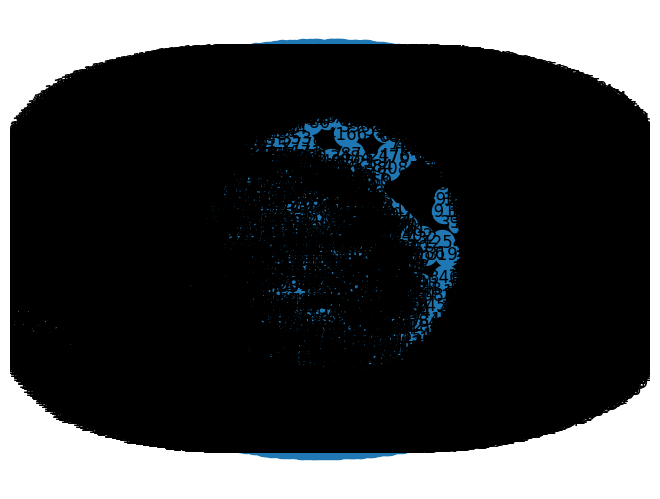

In [451]:
Data = open('complete_network.csv', "r")
next(Data, None)  
dgraph = nx.parse_edgelist(Data, delimiter=',', create_using=nx.DiGraph(),
                      nodetype=int, data=(('weight', float),))

# d.add_edges_from()
nx.draw(dgraph,with_labels=True)

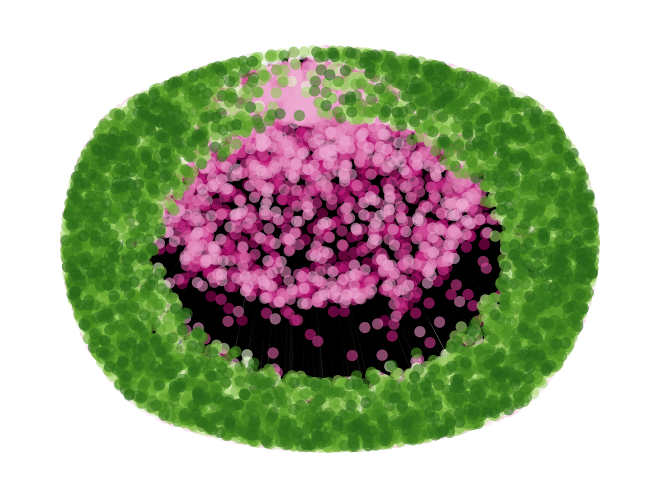

In [454]:
nx.draw(dgraph,  node_color=range(18757), cmap=plt.cm.PiYG, edge_color="black", linewidths=0.3, node_size=60, alpha=0.6, with_labels=False)


In [ ]:
user_name = "@elonmusk"

tweetDf= {}
replies = tweepy.Cursor(api.search, q='to:{}'.format(user_name),
                                since_id=tweet_id, tweet_mode='extended').items()
while True:
    try:
        reply = replies.next()
        tweetList = []
        tweetReplies= []
        if not hasattr(reply, 'in_reply_to_status_id_str'):
            continue
        else:
            tweetDf['id'] = 
            tweetDf['Tweet'] = tweet.full_text
            tweetDf['Replies'] = reply.full_text
           logging.info("reply of tweet:{}".format(reply.full_text))
        

    except tweepy.RateLimitError as e:
        logging.error("Twitter api rate limit reached".format(e))
        time.sleep(60)
        continue

    except tweepy.TweepError as e:
        logging.error("Tweepy error occured:{}".format(e))
        break

    except StopIteration:
        break

    except Exception as e:
        logger.error("Failed while fetching replies {}".format(e))
        break

In [5]:
tweetdf = pd.read_csv('CompleteTweet.csv', parse_dates=['date'])
tweetdf['Tweet'].size

18032

In [6]:
tweetdf1 = tweetdf[tweetdf['Tweet'].str.contains("future")]

In [10]:
tweetdf1['Tweet'][46]

'@MuskUniversity Vital to the future of consciousness'

In [14]:
tweetdf2 = tweetdf[tweetdf['Tweet'].str.contains("next")]

In [17]:
tweetdf2['Tweet'][87]

'The next question one is typically asked is “Have you tried ayahuasca?”\nhttps://t.co/zo3Lw6nlxw'

In [19]:
# TweetsElonMusk.csv

tweetdf3 = pd.read_csv('TweetsElonMusk.csv')
# tweetdf4['Tweet'].size

In [25]:
tweetdf3.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1381273474400800773,1381002894032347138,2021-04-11 18:50:33 EEST,2021-04-11,18:50:33,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'vincent13031925', 'name': 'V...",NaN,NaN,NaN,NaN
1,1381273076709478403,1372444955050971142,2021-04-11 18:48:58 EEST,2021-04-11,18:48:58,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1381258144916008964,1381230136918433792,2021-04-11 17:49:38 EEST,2021-04-11,17:49:38,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'agnostoxxx', 'name': 'Shrubb...",NaN,NaN,NaN,NaN
3,1381221447322935303,1381221447322935303,2021-04-11 15:23:49 EEST,2021-04-11,15:23:49,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1381129584435818496,1381079981485252611,2021-04-11 09:18:47 EEST,2021-04-11,09:18:47,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'itsALLrisky', 'name': '💸💸💸',...",NaN,NaN,NaN,NaN
